In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import hddm 
from patsy import dmatrix 
import numpy as np
from sys import platform
# print(hddm.__version__)

%matplotlib inline
# plt.rcParams['figure.figsize'] = 30, 10

/anaconda3/envs/hddm/lib/python3.5/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


## Pre-processing

In [2]:
if platform == 'linux':
    home = '/home/krista/'
elif platform == 'darwin': 
    home = '/Users/67981492/'

In [3]:
!pwd
write_dir = home + 'Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/'

/Users/67981492/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/analysis_nbs


In [4]:
all_sim_data = hddm.load_csv(home + 'Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/aggregated_data/probC_sim_learning_signals.csv')

In [5]:
all_sim_data.head(10)

,cpp,target_B,choice_B,cp,gen_drift,gen_bound,rt,acc,subj_idx,cond
0,0.029704,0.000000,0.000000,0.0,0.015531,0.424191,0.700,False,0,lc
1,0.025951,0.000000,0.000000,0.0,0.015531,0.559408,0.700,False,0,lc
2,0.276408,0.044556,-0.044556,0.0,0.015531,0.551903,0.700,True,0,lc
3,0.044398,0.082327,-0.082327,0.0,0.238311,1.052817,0.700,False,0,lc
4,0.060615,-0.793546,0.793546,0.0,0.649945,0.588797,0.462,True,0,lc
5,0.028737,-0.014430,-0.014430,0.0,1.000000,0.621229,0.222,False,0,lc
6,0.025882,0.605188,-0.605188,0.0,1.000000,0.557474,0.222,False,0,lc
7,0.522109,0.815333,-0.815333,0.0,1.000000,0.551764,0.332,True,0,lc
8,0.041889,0.930693,0.930693,0.0,1.000000,1.544218,0.700,False,0,lc
9,0.029547,2.245698,-2.245698,0.0,1.000000,0.583779,0.362,True,0,lc


In [6]:
all_sim_data.columns = all_sim_data.columns.str.strip()
all_sim_data.head()

,cpp,target_B,choice_B,cp,gen_drift,gen_bound,rt,acc,subj_idx,cond
0,0.029704,0.000000,0.000000,0.0,0.015531,0.424191,0.700,False,0,lc
1,0.025951,0.000000,0.000000,0.0,0.015531,0.559408,0.700,False,0,lc
2,0.276408,0.044556,-0.044556,0.0,0.015531,0.551903,0.700,True,0,lc
3,0.044398,0.082327,-0.082327,0.0,0.238311,1.052817,0.700,False,0,lc
4,0.060615,-0.793546,0.793546,0.0,0.649945,0.588797,0.462,True,0,lc


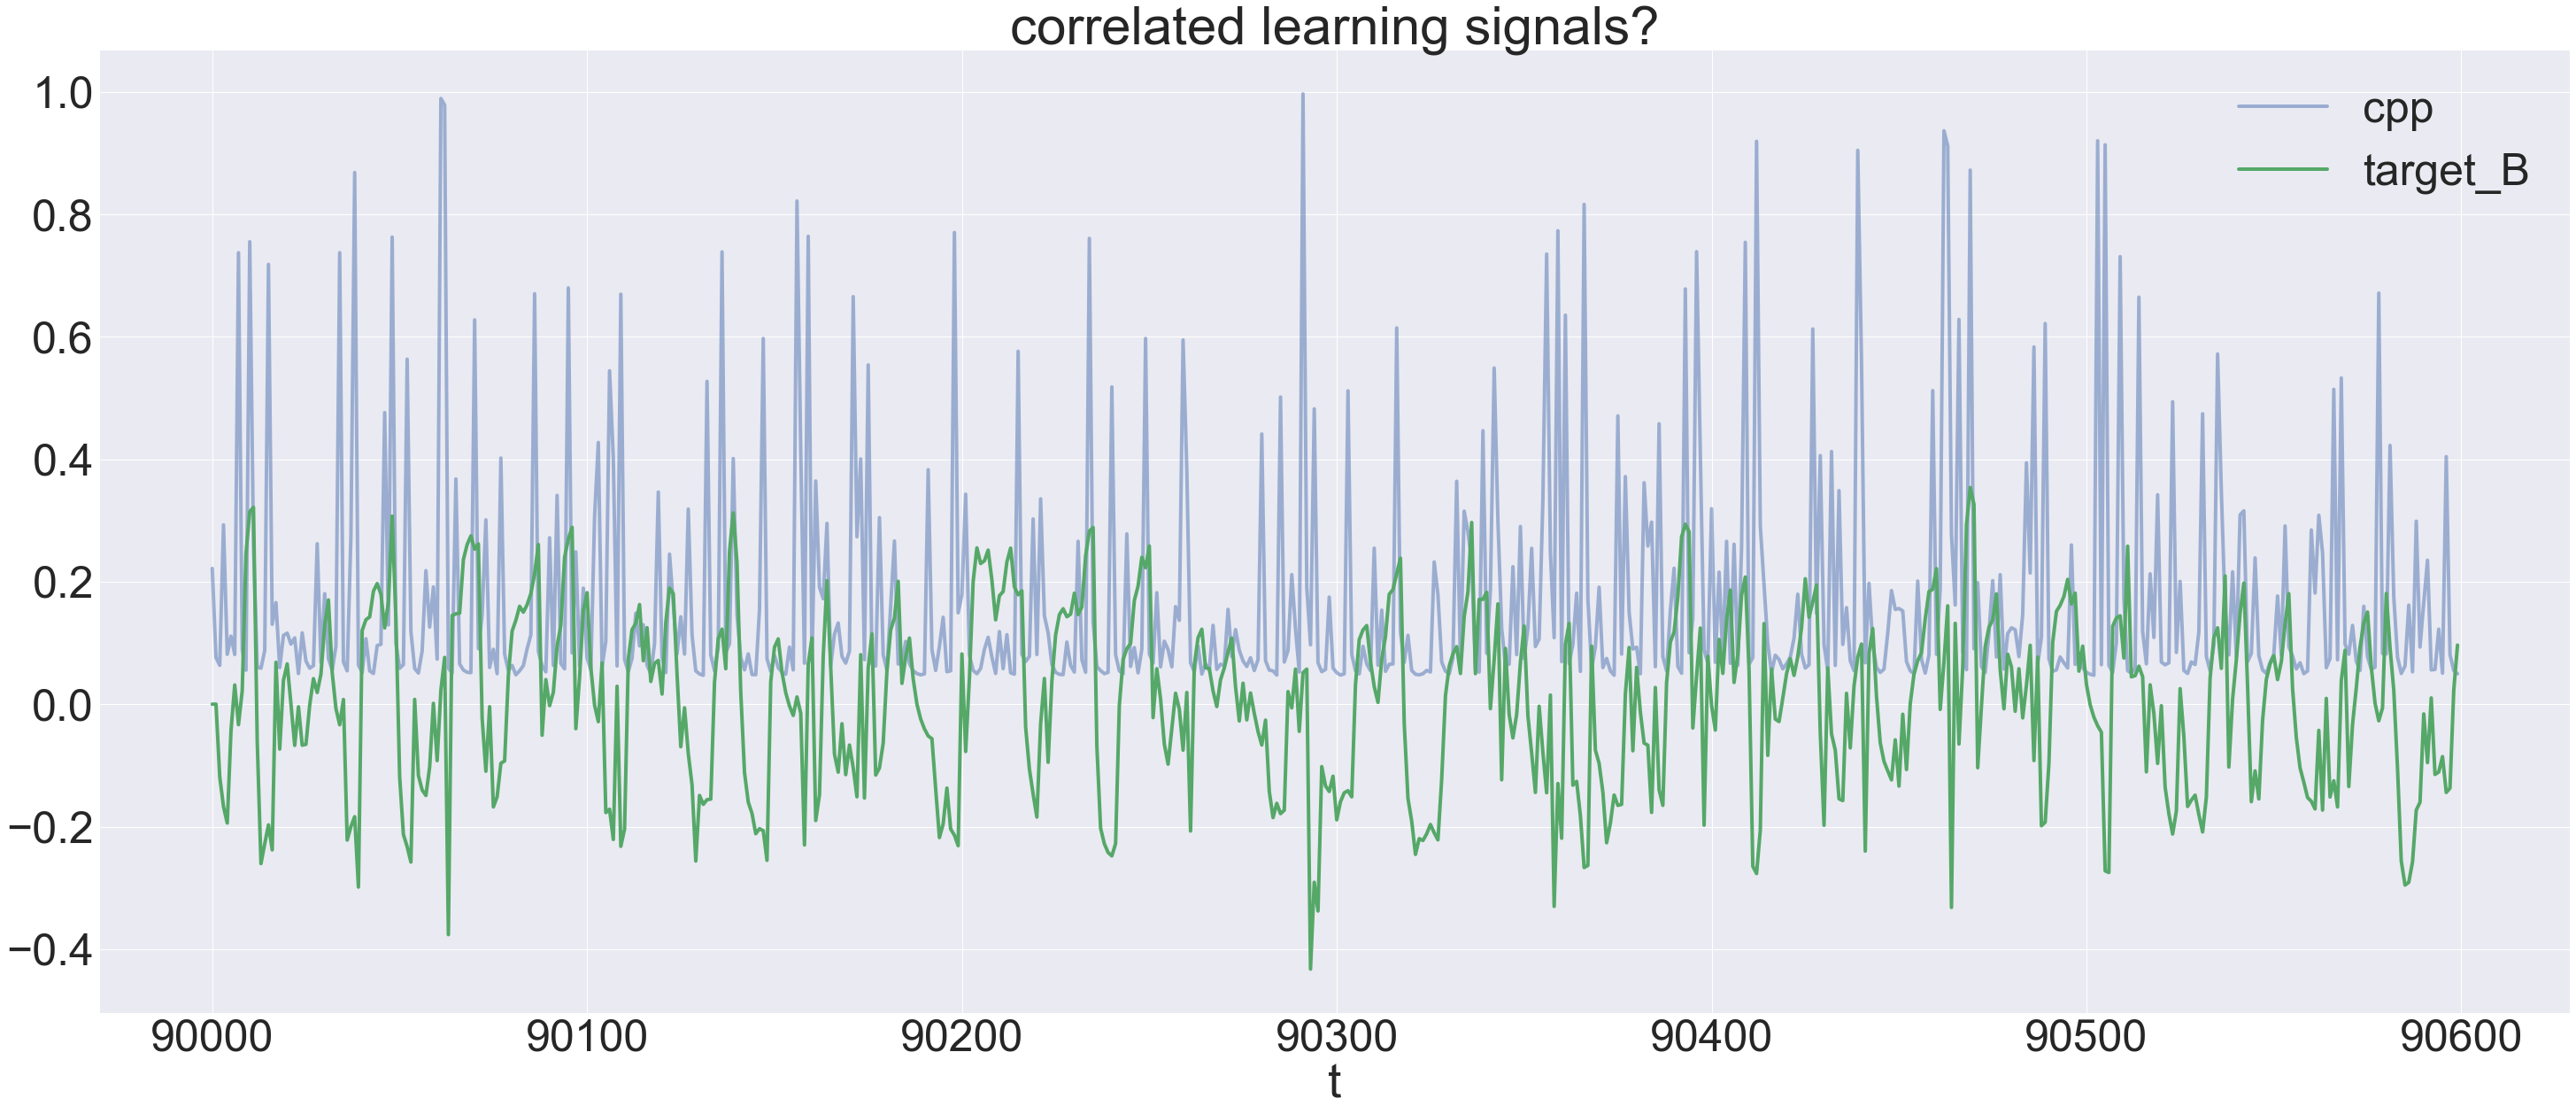

In [70]:
plt.rcParams['figure.figsize'] = 50, 20
sns.set(font_scale=5)
plt.plot(all_sim_data.cpp[(all_sim_data.cond == 'hv') & (all_sim_data.subj_idx == 0)], linewidth=4, label='cpp', alpha=0.5)
plt.xlabel('t')
# plt.ylabel('learning signal')
plt.plot(all_sim_data.target_B[(all_sim_data.cond == 'hv')& (all_sim_data.subj_idx == 0)]/10, linewidth=4, label='target_B')
# plt.plot(all_sim_data.choice_B[(all_sim_data.cond == 'hv')& (all_sim_data.subj_idx == 0)], linewidth=4, label='choice_B', alpha=0.5)
plt.title('correlated learning signals?')
plt.legend()

In [71]:
from scipy.stats.stats import pearsonr   


print(pearsonr(all_sim_data.cpp, all_sim_data.target_B))
pearsonr(all_sim_data.cpp, all_sim_data.choice_B)

(0.0098222167448104494, 0.0006675712983383982)


(-0.032932474638563532, 3.6796070525346648e-30)

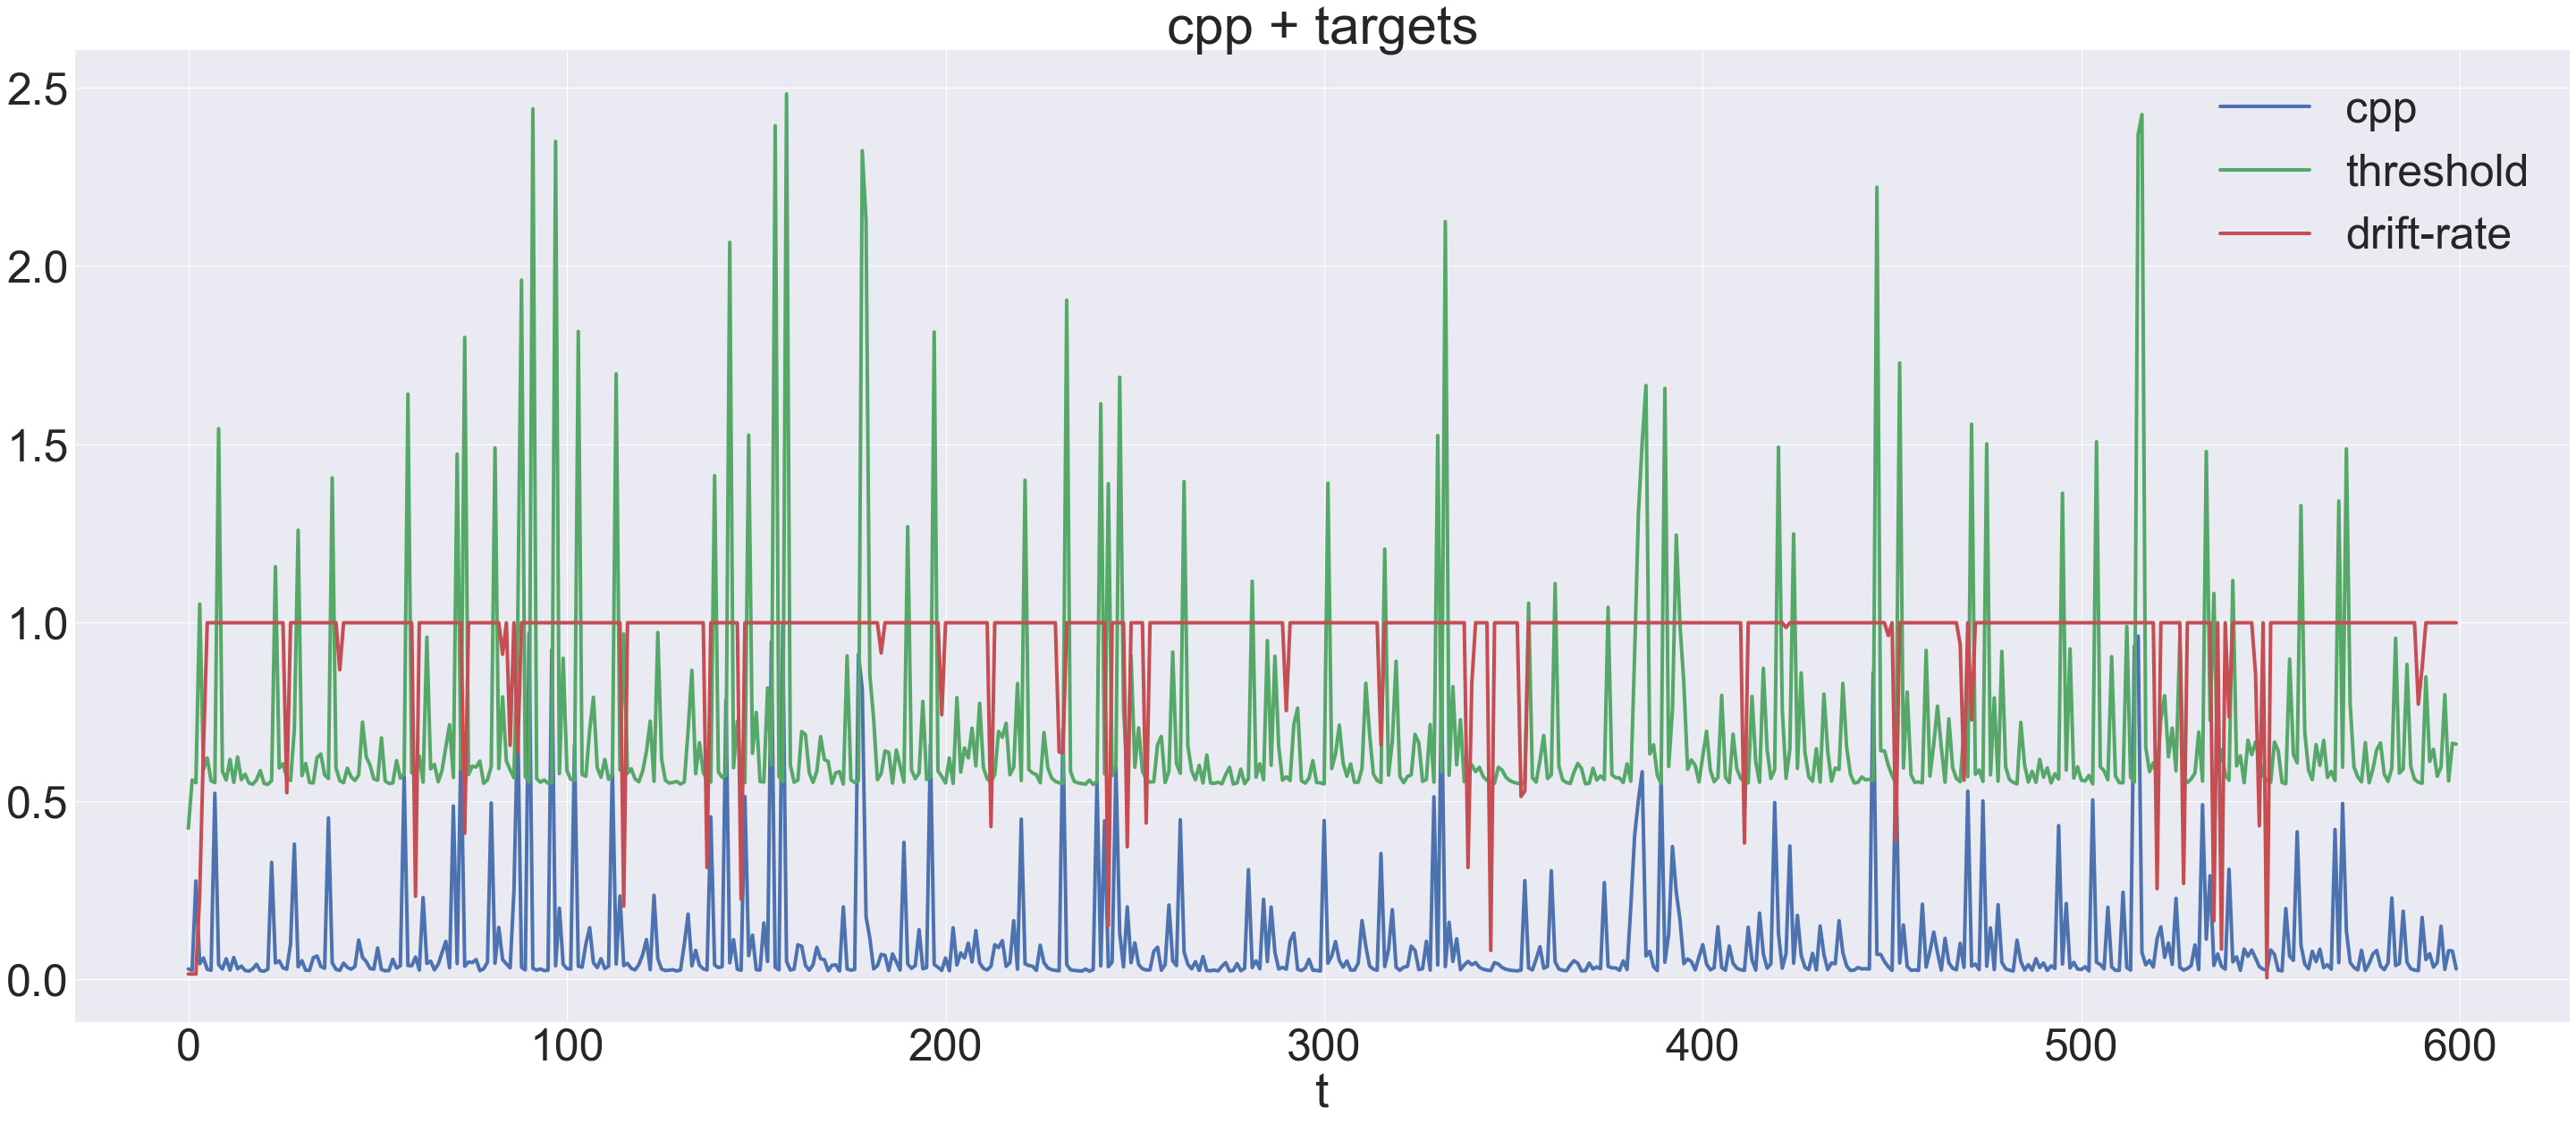

In [52]:
plt.plot(all_sim_data.cpp[0:600], linewidth=4, label='cpp')
plt.xlabel('t')
# plt.ylabel('learning signal')
plt.plot(all_sim_data.gen_bound[0:600], linewidth=4, label='threshold')
plt.plot(all_sim_data.gen_drift[0:600], linewidth=4, label='drift-rate')

# plt.plot(all_sim_data.choice_B[0:600], linewidth=4, label='choice_B', alpha=0.5)
plt.title('cpp + targets')
plt.legend()

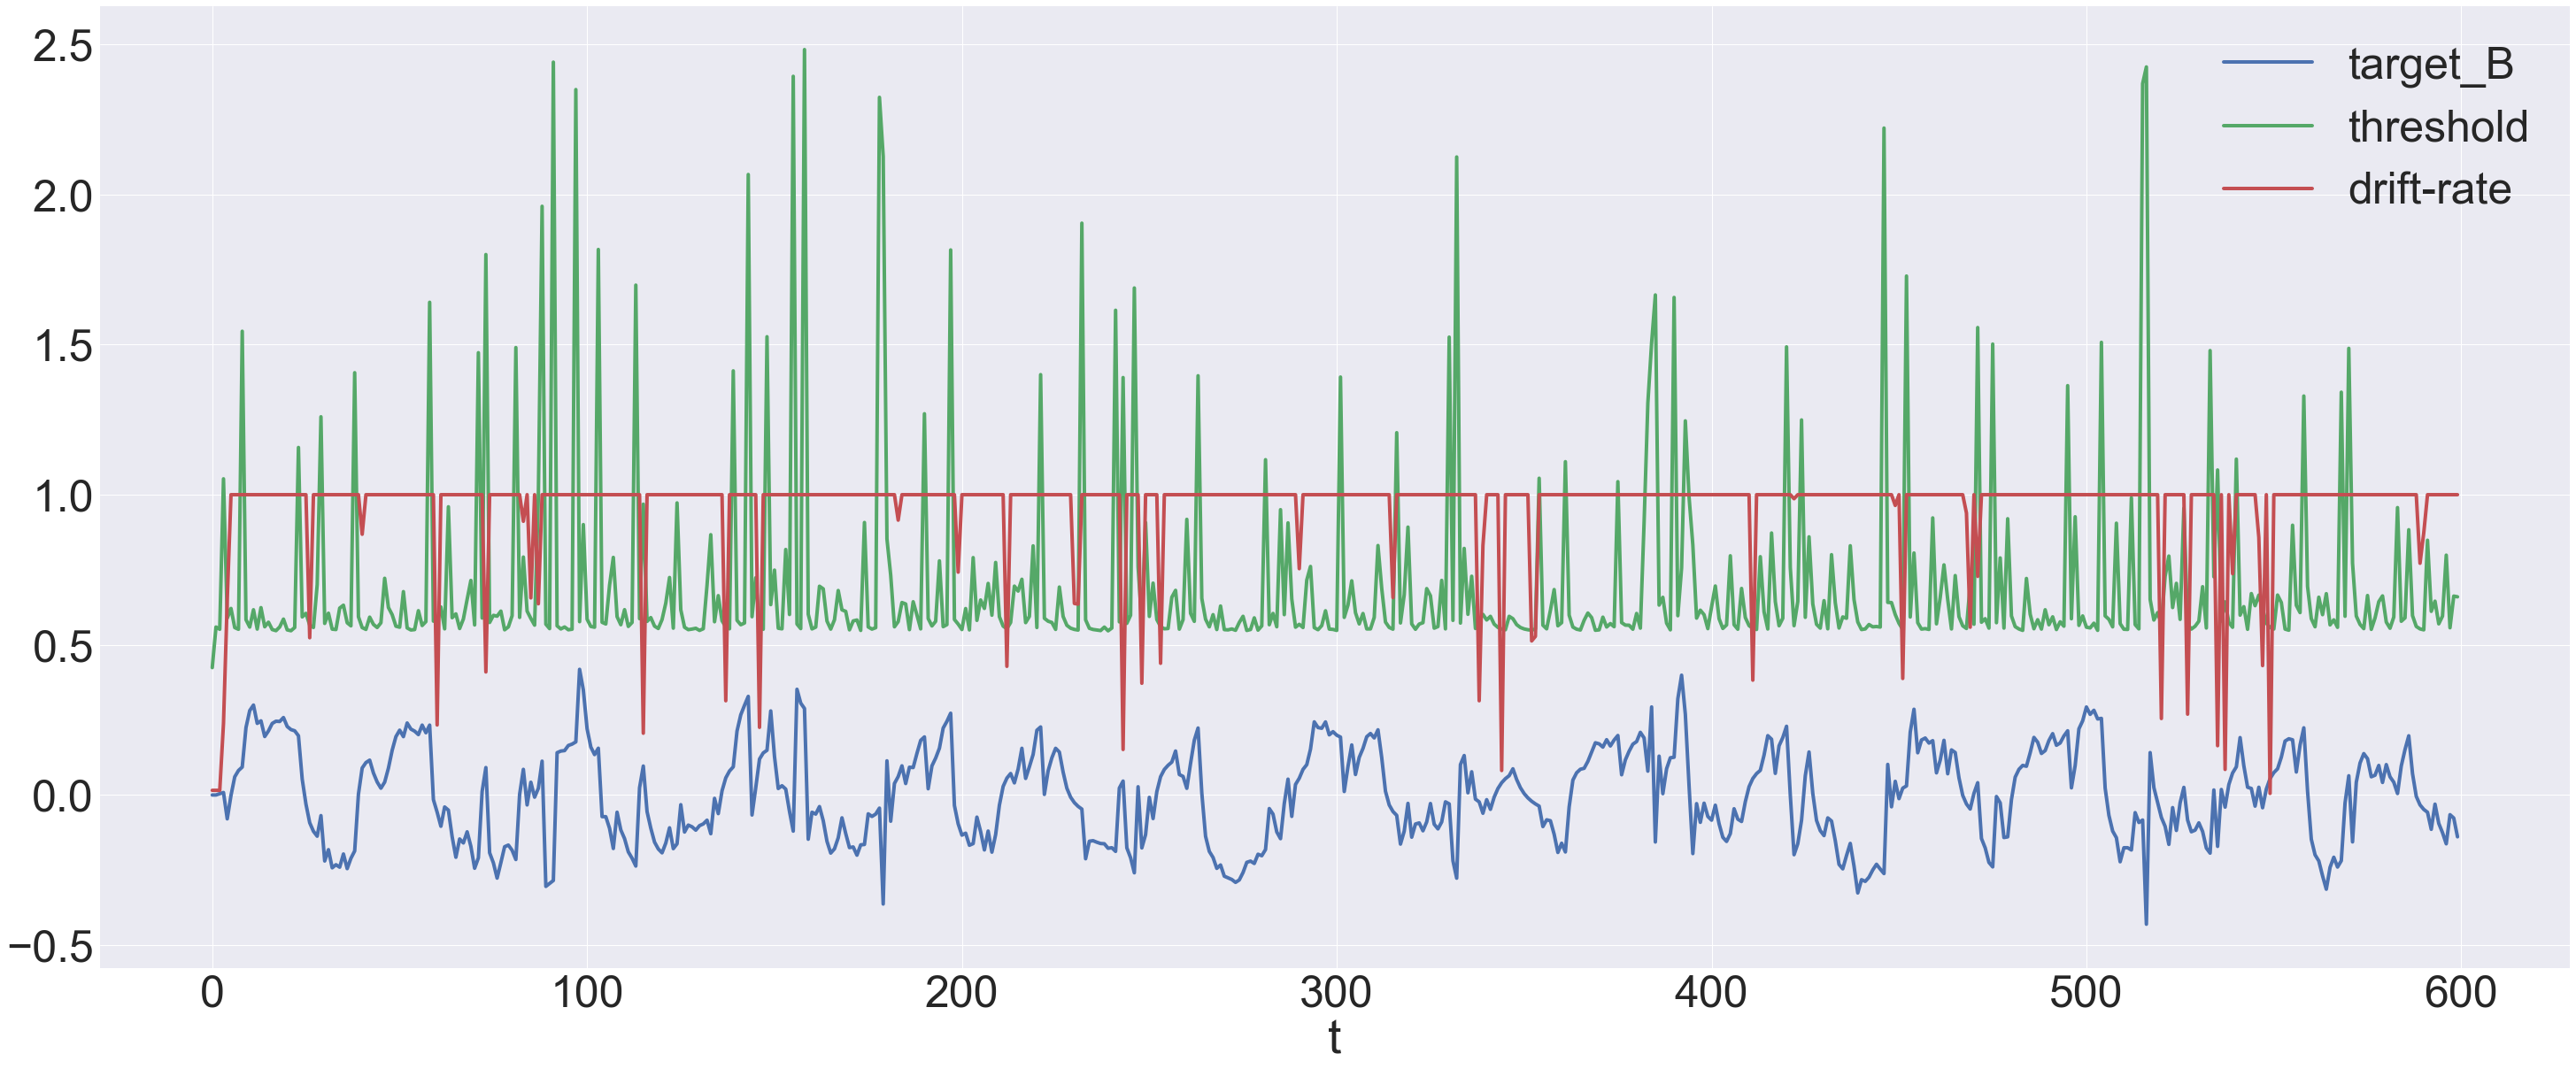

In [55]:
#scaling this for comparison
plt.plot(all_sim_data.target_B[0:600]/10, linewidth=4, label='target_B')
plt.xlabel('t')
# plt.ylabel('learning signal')
plt.plot(all_sim_data.gen_bound[0:600], linewidth=4, label='threshold')
plt.plot(all_sim_data.gen_drift[0:600], linewidth=4, label='drift-rate')

plt.legend()